# Aykırı Gözlem Analizi 

### **Kime Göre neye Göre Aykırı Gözlem?**
#### **1. Sektör bilgisi** : (ev sektöründe araştırma yapıyosak sayıca az olan 1000 m^2 evleri araştırma dışında bırakmak gibi)
#### **2. Standart sapma yaklaşımı :** Bir değişkenin ortalamasının üzerine aynı değişkenin standart sapması hesaplanarak eklenir. (2-3 kere daha eklenebilir ve bu değerler dışında kalan değerler aykırı olarak sayılabilir)
#### **3. Z-Skoru Yaklaşımı :** Standart sapma yöntemine benzer şekilde çalışır. Değişken standart normal dağılıma uyarlanır, yani standartlaştırılır. Sonrasında -örneğin- dağılımın sağından ve solundan +- 2.5 değerine göre bir eşik değer konulur ve bu değerin üzerinde ve altında olan değerler aykırı değer olarak sayılır.
#### **4. Boxplot Yöntemi :** En sık kullanılan yöntemlerden birisidir. Değişkenin değerleri küçükten büyüğe doğru sıralanır. Çeyrekliklerine göre(yüzdeliklerine) yani Q1,Q3 değerlerine göre karşılık değerler üzerinden bir eşik değer hesaplanır ve bu değere göre altında üstünde kalan değerler aykırı değer olarak sayılır. Aykırı değer sayılması için gerekli formül: 
#####      **IQR = 1.5 x(Q3-Q1)**
#####      **Q1-IQR = Alt eşik değer**
#####      **Q3+IQR = Üst eşik değer**

## Aykırı Değerleri Yakalamak

In [18]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

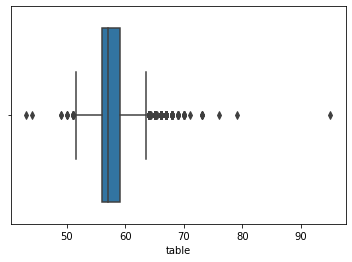

In [20]:
sns.boxplot(x = df_table);

In [21]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1
# alt ve üst sınırları belirliyoruz.

In [22]:
Q1

56.0

In [23]:
Q3

59.0

In [24]:
IQR

3.0

In [25]:
alt_sinir = Q1-1.5*IQR

In [26]:
alt_sinir

51.5

In [27]:
ust_sinir = Q3 + 1.5*IQR

In [28]:
ust_sinir

63.5

In [29]:
(df_table <alt_sinir)  | (df_table > ust_sinir) 

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [30]:
aykiri_all = ((df_table <alt_sinir)  | (df_table > ust_sinir) )
# alt ve üst sınır olanlar için aldık bu aykiri_all değişkeninini

In [31]:
aykiri_tf = (df_table < alt_sinir)

In [32]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [33]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [34]:
df_table[aykiri_tf].index
#sadece index değerlerini bulup bu değerlere erişim düzeltmek için bu yöntemi de kuullanacağız.

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [35]:
df_table[aykiri_all]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [36]:
df_table[aykiri_all].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

# **Aykırı Dğere Problemlerini Çözme**

### **Silme yaklaşımı**

In [37]:
import pandas as pd

In [38]:
type(df_table)

pandas.core.series.Series

In [39]:
df_table = pd.DataFrame(df_table)

In [40]:
df_table.shape

(53940, 1)

In [41]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any (axis = 1)]
# ~ işareti kendinden sonra gelen koşulu sağlamayan değerleri getirmesi için kullanılıyor.

In [42]:
t_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [43]:
t_df.shape

(53335, 1)

### **Ortalama İle Doldurma**

In [44]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [45]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [46]:
df_table[aykiri_tf]
# sadece alt sınıra göre yapıyoruz

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [47]:
df_table.mean()

57.45718390804603

In [48]:
df_table[aykiri_tf] = df_table.mean()

/home/eren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### **Baskılama Yöntemi**
##### aykırı değerleri üst sınırdan fazlaysa üst sınıra, alt sınırın altındaysa alt sınıra eşitler.(sınırlara doğru baskılayarak)

In [50]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [51]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [52]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [53]:
alt_sinir

51.5

In [54]:
df_table[aykiri_tf] = alt_sinir

/home/eren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

## Çok Değişkenli Aykırı Gözlem Analizi

### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [56]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include = ["float64", "int64"])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [57]:
import numpy as np 
from sklearn.neighbors import LocalOutlierFactor

In [58]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [59]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [60]:
df_scores = clf.negative_outlier_factor_

In [61]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [62]:
#yukarda bahsettiğimiz üzere bu skorlar her değişkenin yoğunluk skoru

In [63]:
np.sort(df_scores[0:10])

array([-1.62278873, -1.59732899, -1.58352526, -1.33002541, -1.30712521,
       -1.28428162, -1.28422952, -1.28408436, -1.27351342, -1.26458706])

In [64]:
np.sort(df_scores[0:20])

array([-1.62278873, -1.59732899, -1.58352526, -1.33002541, -1.30712521,
       -1.28428162, -1.28422952, -1.28408436, -1.27351342, -1.26458706,
       -1.23611906, -1.21093135, -1.20830179, -1.17637026, -1.14305176,
       -1.13307628, -1.13060731, -1.11364018, -1.08139269, -1.08093519])

In [65]:
#değerler birbirine çok yakın. bormalde en hızlı azalış 1.33'te olmuş bunu alabilirdik ama şimdi biz kafamızdan bir değer belirleyeceğiz.
# yukarda önce ilk 20'yi seçip sıraladık değerlerin hepsi yakın çıktı birbirine ancak önce sıralayıp sonra ilk yirmiyi seçmek daha mantıklı aşağıda yaptığımız gibi

In [66]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [67]:
# örneğin 13ü eşik değeri olarak seçelim diğerleri aykırı değer olarak alalım

In [68]:
np.sort(df_scores)[13]

-3.823787967755565

In [69]:
esik_deger = np.sort(df_scores)[13]

In [70]:
aykiri_tf = df_scores > esik_deger

In [71]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [72]:
yeni_df = df[df_scores > esik_deger]

In [73]:
yeni_df
#aykırı olmayan değerleri yazdırdık

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [74]:
#aykırıları görmek istersek
df[df_scores  < esik_deger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


### Baskılama Yöntemi

In [75]:
baski_deger = df[df_scores  == esik_deger]
aykirilar = df[~aykiri_tf]

In [76]:
baski_deger


,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [77]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


##### Elimizdeki mevcut aykırıların yeirne eşik değerleri atayacağımızdan dolayı bazı index problemleri ortaya çıkıyor. Bunun için de öncelikle aykırılar dataframe'ini indexxiz arraya çeviricez. Sonra baskı gözlemini de arrayleştirip atama işlemini gerçekleştiricez. Son olarak aykırı değerleri de baskı değerleri ile değiştiricez

In [78]:
res = aykirilar.to_records(index = False)

In [79]:
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [80]:
#yukarda görüldüğü üzere aykırı değerler incex olmadan listelendi. Aşağıda ise baskı değerlerini bu aykırı değerler yerine yerleştirdik.

In [81]:
res[:] = baski_deger.to_records(index = False)

In [82]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [83]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [84]:
# Yukardaki aykırıları baskıladığımız değerler gerçek verinin içine yerleştirmemiz gerekiyor çünkü hala gerçek liste içindeki aykırı değerler duruyor.

In [85]:
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [86]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


#### bu işlem karmaşık ve ileri düzey bir işlem. Çokk değişken için önce herbiri için skor oluşturduk buna göre aykırı değer oluşturduk. Sonra bu aykırı değerleri göz önüne baskıladık(istediğimiz değerden yukarıda olanları) sonra da bunları ana dataframe'in içine attık.

#### Önce silme yaklaşımıyla bu değerleri sildik. sonra baskılama yöntemiyle atamış olduk.

# **Eksik Veri Analizi**

### Veri setindeki eksikliklerin silinmesi bazı problemlere yol açabilir. Yapısal olarak bir eksiklikse yani rastlantısal olarak oluşmadıysa problem olabilir. Bunun olmaması için yapılması gerekenler:
#### 1. Veri setindeki eksikliğin yapısal bir eksiklik olup olmadıpının bilinmesi gerekir.
#### 2. NA her zaman eksiklik anlamına gelmez! (bazen ilgili olayla alakalı ölçüm yapılmadığı ya da sıfır olduğu anlamına gelebilir)
#### 3. Bilgi kaybı! (bir değişkeni ilkiglendiren 100 bilgiden 1 tanesi eksik olduğunda bunu silersek doğru olan diğer 99 bilgiyi de silmiş olacağız ki bu ciddi bir kayıp)


-----------------------------

### Eksik Veri Türleri Nelerdir?
#### **Tümüyle Rastlantısal Kayıp :** Diğer değişkenlerden ya da yapısal bir problemden kaynaklanmayan tamamen rastgele oluşan gözlemler.
#### **Rastlantısal Kayıp :** Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü.
#### **Rastlantısal Olmayan Kayıp :** Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü.

-----------------------------

## Eksik Veri Rassallığının Testi

#### - Görsel Teknikler (*)
#### - Bağımsız İki Örneklem T Testi
#### - Korelasyon Testi
#### - Little'nin MCAR Testi (*)




-------------------------------------

## Eksik Veri Problemi Nasıl Giderilir? 


### **Silme Yöntemleri**
#### - Gözlem ya da değişken silme yöntemi
#### - Liste bazında silme yöntemi (Listwise Method)
#### - Çiftler bazında silme yöntemi (Pariwise Method)

### **Değer Atama Yöntemleri**
#### - Ortanca, ortalama, medyan
#### - En benzer birimlere atama (hot deck)
#### - Dış kaynaklı atama


### **Tahmine Dayalı Yöntemler**
#### - Makine öğrenmesi
#### - EM
#### - Çoklu atama yöntemi

## Hızlı Çözüm

In [87]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [88]:
df.isnull().sum()
#değişkenlerdeki eksik olan değeleri görmek için

V1    2
V2    3
V3    2
dtype: int64

In [89]:
df.notnull().sum()
#değişkenlerdeki eksik olmayan değerleri görmek için

V1    7
V2    6
V3    7
dtype: int64

In [90]:
df.isnull().sum().sum()
#veri setindeki toplamdaki eksik olan değeleri görmek için

7

In [91]:
df.isnull()
#eksiklik var mı yok mu

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [92]:
df[df.isnull().any(axis =1)]
#en az bir tane eksik gözlem varsa "any kısmı" o gözlemleri görmek için

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [93]:
df[df.notnull().all(axis =1)]
#Eksik gözlem olmayan gözlemlere ulaşmak için


,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [94]:
df[df["V1"].notnull( ) & df["V2"].notnull( ) & df["V3"].notnull( )]
#all(axis =1 ) olmadan da sorgulayabiliriz.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik değerlerin hemen silinmesi

In [95]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [96]:
df
#kalıcı bir değişken olmadı.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [97]:
df.dropna(inplace = True)
#kalıcı olarak silmek için

In [98]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Basit değer atama

In [99]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [100]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [101]:
df["V1"].mean()

6.0

In [102]:
df["V1"].fillna(df["V1"].mean())
#elimizdeki eksik verileri kendi ortalamasıyla değiştirdik.

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [103]:
df["V2"].fillna(0)
#V2deki eksik değerler yerine isteğe bağlı değer atadık burda 0'ı atadık.

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

#### **Elimizde birden fazla değişken varsa**

In [104]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [105]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)
#sütünlara göre otomatikman her sütunu kendi ortalamasıyla doldur dedik.

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Eksik Değerlerin Saptanması

In [106]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [107]:
#değişkenlerdeki eksik değer sayısı
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [108]:
#veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

7

In [109]:
#en az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [110]:
#tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Eksik Veri Yapısının Görselleştirilmesi

In [111]:
!pip install missingno

In [112]:
import missingno as msno

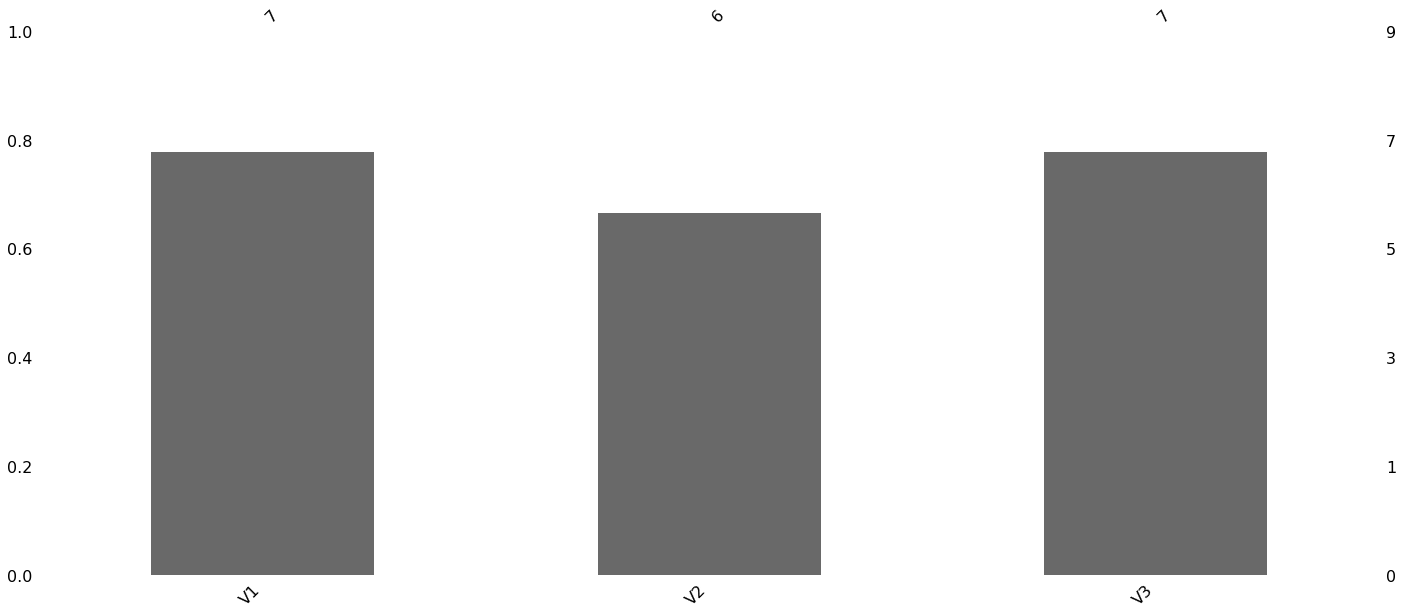

In [113]:
msno.bar(df);
#üstte tam veriler sağdaki eksenden de kaç eksik veri olduğunu ,en solda da yüzdelik olarak ekskiksleri göstermektedir.

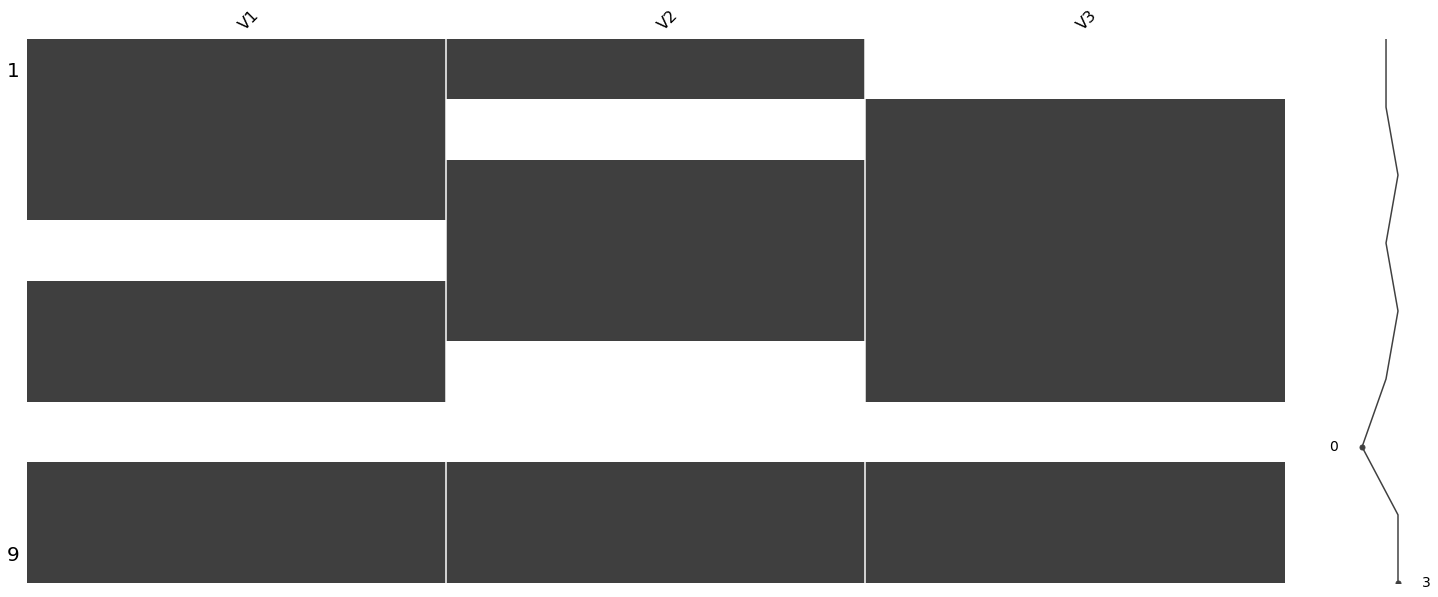

In [114]:
msno.matrix(df);
#eksik değerlerin rassallığıyla ilgil yapısal bozuklukları gösteriyor. soldaki eksen gözlem birimlerini ifade ediyor. aşağıdaki df çağırıldığında bunu karşılaştırabiliriz. 
#sağdaki çizgide aynı anda dolu ve boş olan değerleri gösteriyor.

In [115]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [116]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()
#tam bir büyük veri setinde uygulayalım

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [117]:
df.isnull().sum()
#eksik değerleri gösteriyoruz.

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

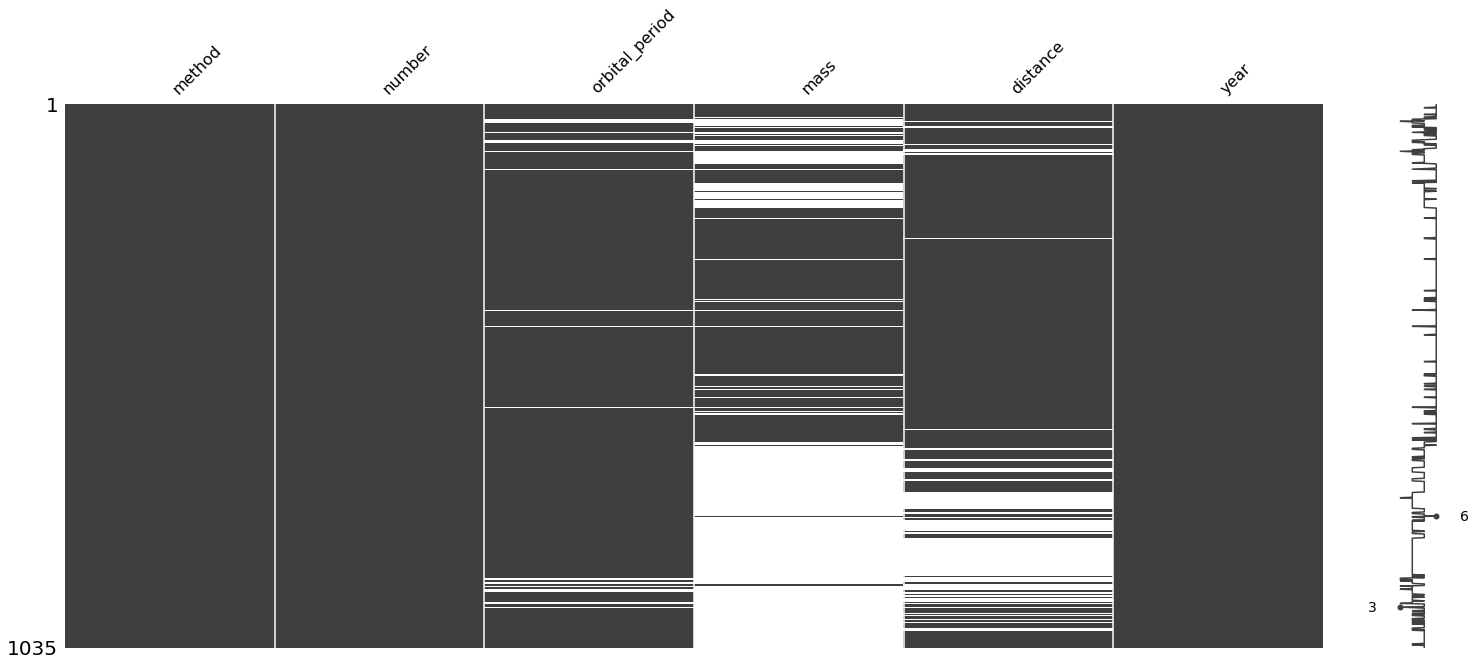

In [118]:
msno.matrix(df);
#1den 1035e kadar gözlem gösterilmiş solda. Sağda ise oluşan boşlukları ve dolulukları gösteriyor.
#aşağıda görünüyor ki orbitalperioddaki değişimler mass'la ilişkili.

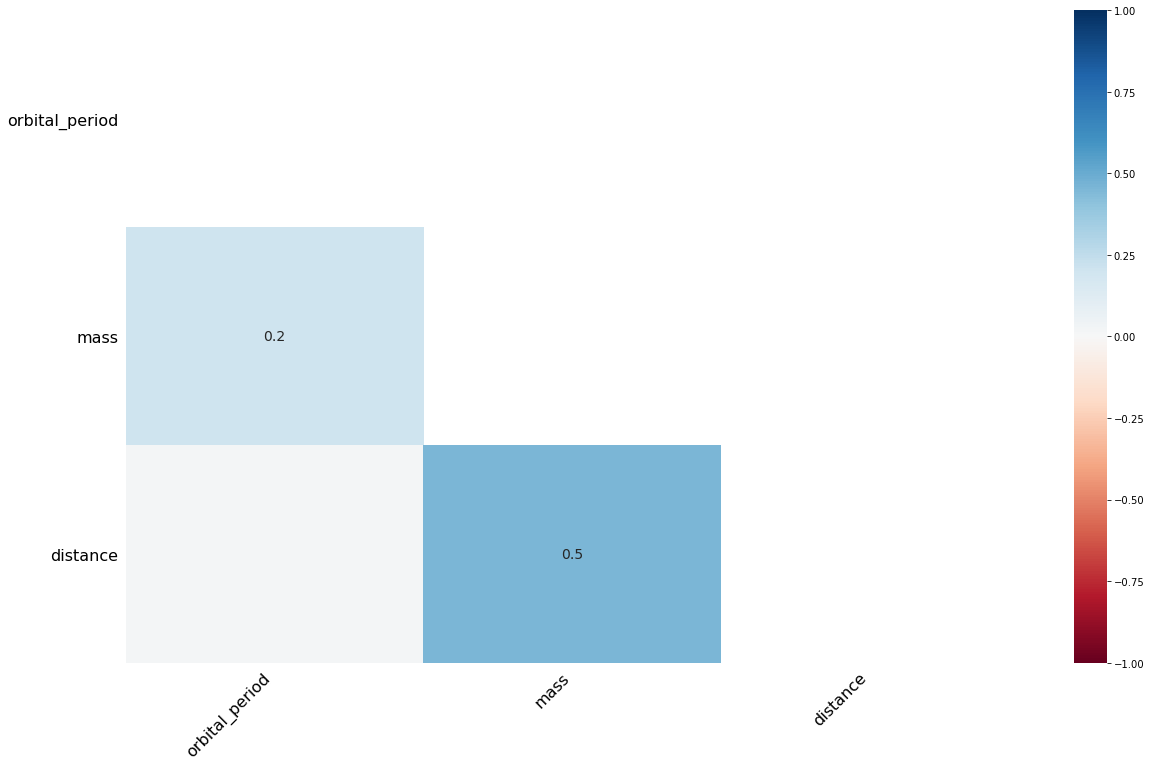

In [119]:
msno.heatmap(df);
#ısıharitasını eksiklği değerlendirmek için kullanıyoruz. nullity corellation isminde bi korelasyon verir(boşluk korelasyonu yeni ilişkisi) bu değerler -1 ile +1 arasında yer alır.
#distance ile mass arasında 0.5(%50) gibi bir ilişki var(orta şiddetli). nullitiy corelation 0'sa aralarında bir ilişki yoktur. bu değer 1 olsaydı çok yüksek olasılıkla arlarında pozitif bir ilişki vardır demek.

## Eksik Veri Yapısının Görselleştirilmesi

In [120]:
import missingno as msno

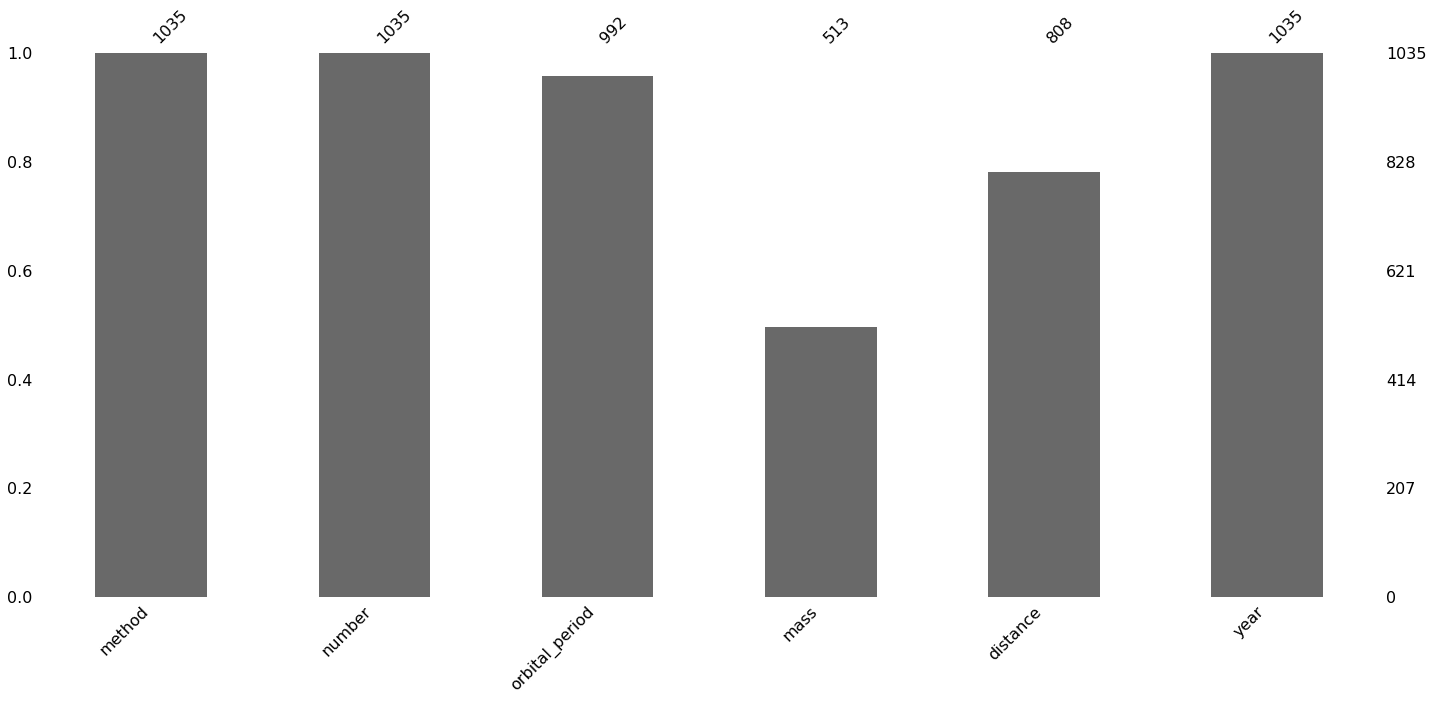

In [121]:
msno.bar(df);

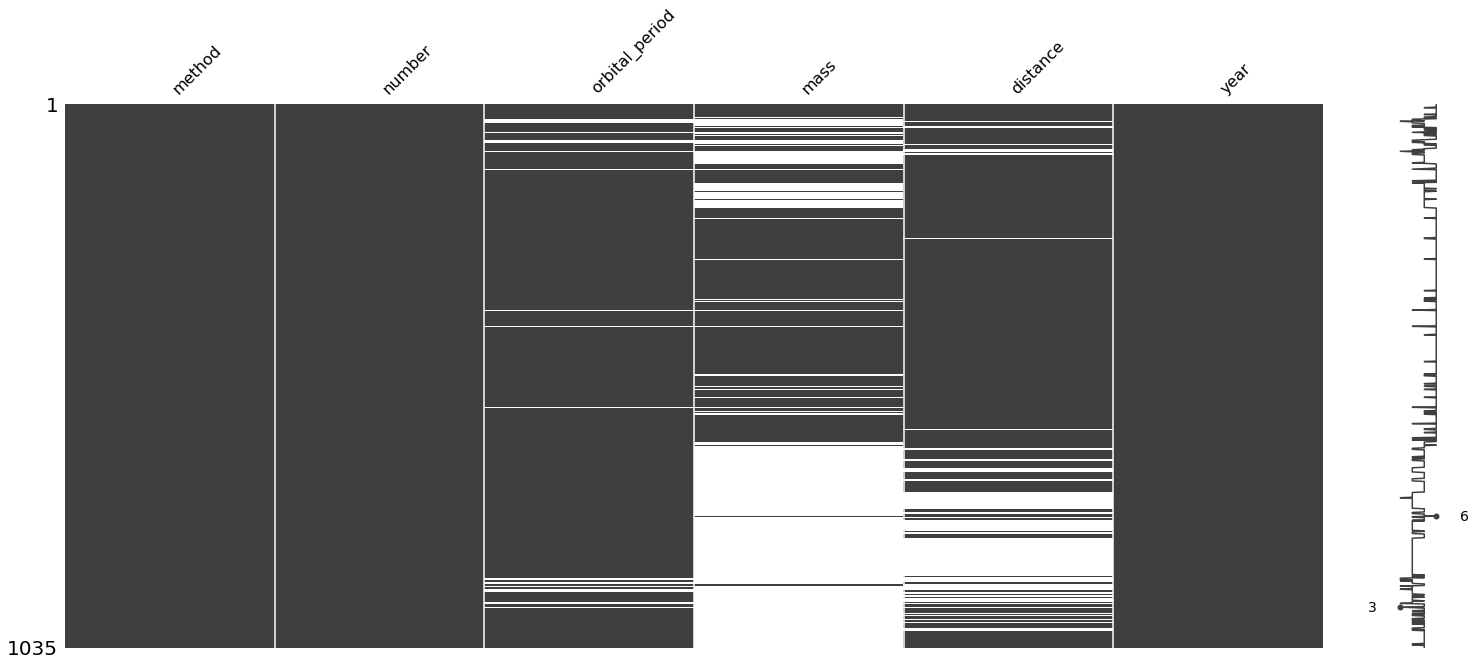

In [122]:
msno.matrix(df);

In [123]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [124]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [125]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

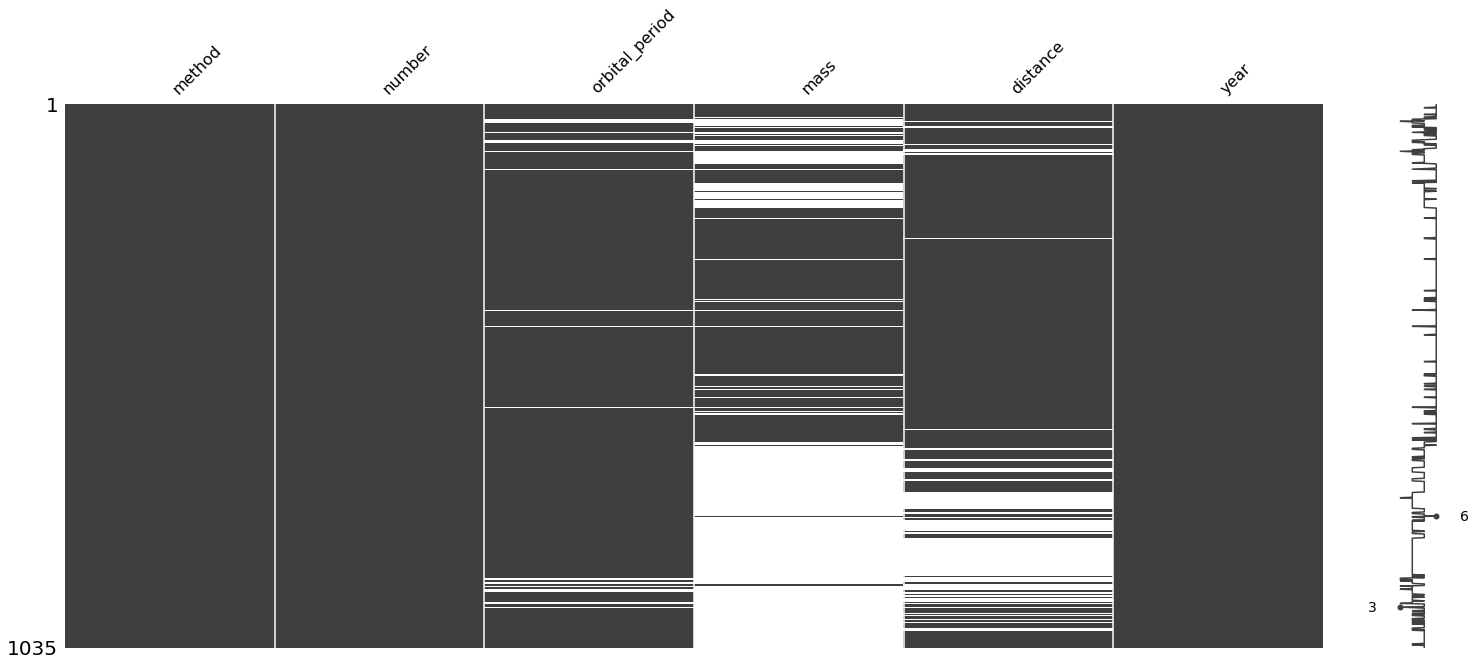

In [126]:
msno.matrix(df);

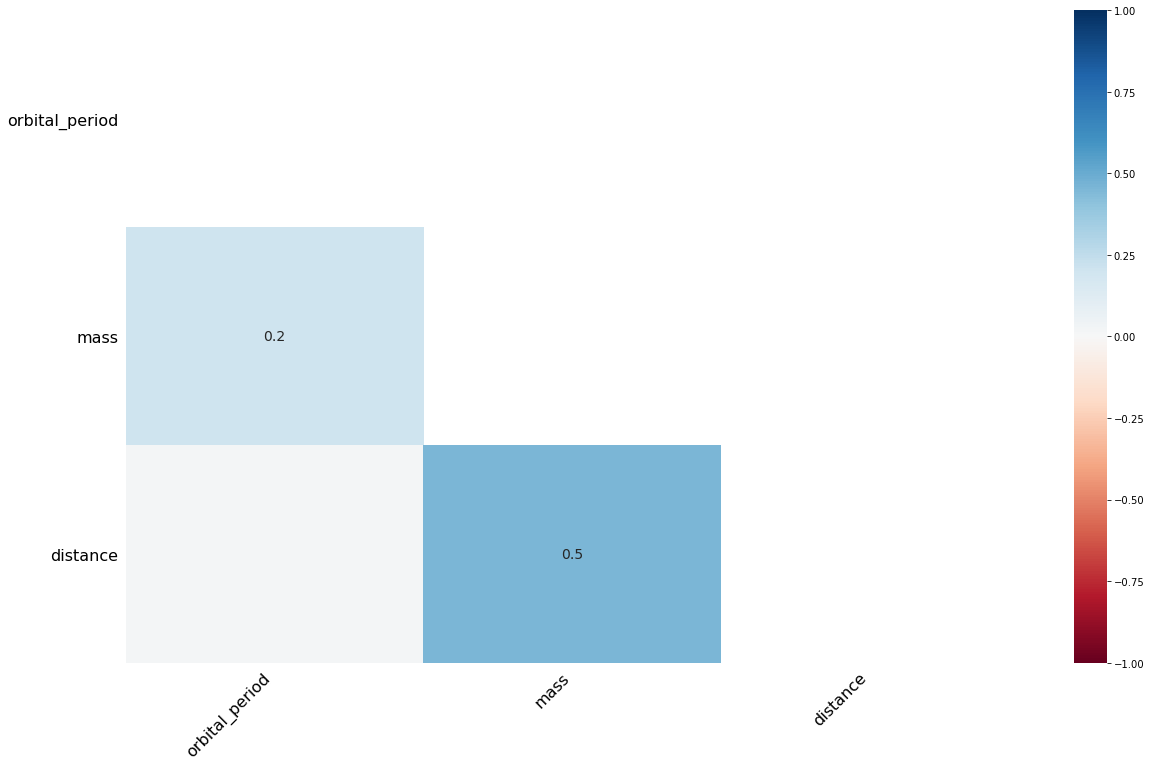

In [127]:
msno.heatmap(df);

## Silme Yöntemleri

In [128]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])


df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [129]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [130]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [131]:
df.dropna(how = "all")
#hepsi eksikse siler

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [132]:
df.dropna(axis = 1)
#V değişkenlerinden birinde hiç eksik olmamış olsaydı o değer kalacaktı. Yani axis1'de hiç eksik olmadığı durumda kalacaktı. Aşağıda V4 değişkenini ekledikten sonra yaptığımızda sonuç ortada.

""
0
1
2
3
4
5
6
7
8


In [133]:
df["V4"]= np.array([1,2,3,4,5,6,7,8,9])

In [134]:
df

,V1,V2,V3,V4
0,1.0,7.0,NaN,1
1,3.0,NaN,12.0,2
2,6.0,5.0,5.0,3
3,NaN,8.0,6.0,4
4,7.0,12.0,14.0,5
5,1.0,NaN,7.0,6
6,NaN,NaN,NaN,7
7,9.0,2.0,2.0,8
8,15.0,3.0,31.0,9


In [135]:
df.dropna(axis = 1)

,V4
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [136]:
df.dropna(axis = 0)
#burda da gördüğümüz üzere yatay olarak belirledik axis=0 şeklinde. yatayda hiç eksiği olmayanlar kaldı.

,V1,V2,V3,V4
2,6.0,5.0,5.0,3
4,7.0,12.0,14.0,5
7,9.0,2.0,2.0,8
8,15.0,3.0,31.0,9


In [137]:
df.dropna(axis=1,how = "all")
#bütün değğişkenleri NA olan değişkenleri silmek için bu da.aşağıda görüldüğü üzere

,V1,V2,V3,V4
0,1.0,7.0,NaN,1
1,3.0,NaN,12.0,2
2,6.0,5.0,5.0,3
3,NaN,8.0,6.0,4
4,7.0,12.0,14.0,5
5,1.0,NaN,7.0,6
6,NaN,NaN,NaN,7
7,9.0,2.0,2.0,8
8,15.0,3.0,31.0,9


In [138]:
df["sil_beni"]=np.nan
df

,V1,V2,V3,V4,sil_beni
0,1.0,7.0,NaN,1,NaN
1,3.0,NaN,12.0,2,NaN
2,6.0,5.0,5.0,3,NaN
3,NaN,8.0,6.0,4,NaN
4,7.0,12.0,14.0,5,NaN
5,1.0,NaN,7.0,6,NaN
6,NaN,NaN,NaN,7,NaN
7,9.0,2.0,2.0,8,NaN
8,15.0,3.0,31.0,9,NaN


In [139]:
df.dropna(axis=1,how = "all")

,V1,V2,V3,V4
0,1.0,7.0,NaN,1
1,3.0,NaN,12.0,2
2,6.0,5.0,5.0,3
3,NaN,8.0,6.0,4
4,7.0,12.0,14.0,5
5,1.0,NaN,7.0,6
6,NaN,NaN,NaN,7
7,9.0,2.0,2.0,8
8,15.0,3.0,31.0,9


In [140]:
df

,V1,V2,V3,V4,sil_beni
0,1.0,7.0,NaN,1,NaN
1,3.0,NaN,12.0,2,NaN
2,6.0,5.0,5.0,3,NaN
3,NaN,8.0,6.0,4,NaN
4,7.0,12.0,14.0,5,NaN
5,1.0,NaN,7.0,6,NaN
6,NaN,NaN,NaN,7,NaN
7,9.0,2.0,2.0,8,NaN
8,15.0,3.0,31.0,9,NaN


In [141]:
df.dropna(axis=1,how = "all",inplace= True)
df

,V1,V2,V3,V4
0,1.0,7.0,NaN,1
1,3.0,NaN,12.0,2
2,6.0,5.0,5.0,3
3,NaN,8.0,6.0,4
4,7.0,12.0,14.0,5
5,1.0,NaN,7.0,6
6,NaN,NaN,NaN,7
7,9.0,2.0,2.0,8
8,15.0,3.0,31.0,9


## Değer Atama

In [142]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### **Sayısal Değişkenlerde** Değer Atama

In [143]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [144]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [145]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [146]:

#Tüm değişkenler için 1.yol
df.apply(lambda x: x.fillna(x.mean()), axis =0)


,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [147]:
#ikinci yol
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [148]:
#birinci ve ikinci değeri ortalamaya göre içincü değeri ise medyana göre Na'leri doldurmak istiyoruz. (1.ve 2. değer simetrik dağılıyor,3. Değer doğrusal dağılmıyor mesela)
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [149]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [150]:
# Üçüncü Yol

In [151]:
df.where(pd.notna(df),df.mean(), axis = "columns")
#eksik değerlerin içine ortalamaları yerleştiriyo

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


#### **Kategorik Değişkenler** Kırılımında Değer Atama

In [152]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [153]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [154]:
df["maas"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: maas, dtype: float64

In [155]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))
#maaş değişkenlerin eksikliklerini departmana kategorik değişkenini göz önünde blundurarak doldu

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

## Kategorik Değişkenler için Eksik Değer Atama

In [156]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [157]:
df["departman"].mode()
#departman değişkeninin modu IK çıkmış aşağıdaki gibi [0] se.tiğimizde string olarak seçip o değeri getirecek

0    IK
dtype: object

In [158]:
df["departman"].mode()[0]

'IK'

In [159]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [160]:
df["departman"].fillna(method = "bfill")
#moduyla doldurmak yerine sonrasındaki değerler ile doldurmak sitersek

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [161]:
df["departman"].fillna(method = "ffill")
#moduyla doldurmak yerine önceki değerler ile doldurmak sitersek

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

## Tahmine Dayalı Değer Atama Yöntemleri

In [162]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [163]:
!pip install ycimpute

In [164]:
from ycimpute.imputer import knnimput

In [165]:
var_names = list(df)

In [166]:
import numpy as np
n_df = np.array(df)

In [167]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [168]:
n_df.shape

(891, 6)

In [169]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.181
Imputing row 101/891 with 0 missing, elapsed time: 0.182
Imputing row 201/891 with 0 missing, elapsed time: 0.184
Imputing row 301/891 with 1 missing, elapsed time: 0.185
Imputing row 401/891 with 0 missing, elapsed time: 0.186
Imputing row 501/891 with 0 missing, elapsed time: 0.188
Imputing row 601/891 with 0 missing, elapsed time: 0.189
Imputing row 701/891 with 0 missing, elapsed time: 0.192
Imputing row 801/891 with 0 missing, elapsed time: 0.195


In [170]:
type(dff)

numpy.ndarray

In [171]:
import pandas as pd 
dff = pd.DataFrame(dff, columns = var_names)

In [172]:
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,22.469024,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000


In [173]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

## Random forest

In [174]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [175]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [176]:
var_names = list(df)

In [177]:
import numpy as np
n_df = np.array(df)

In [178]:
from ycimpute.imputer import iterforest
dff = iterforest.IterImput().complete(n_df)

In [179]:
dff.isnull().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

### EM


In [180]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float", "int64"])

In [181]:
from ycimpute.imputer import EM

In [182]:
var_names = list(df)

In [183]:
import numpy as np
n_df = np.array(n_df)

In [184]:
dff = pd.DataFrame(dff, columns = var_names)

In [185]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# Değişken Standardizasyonu (Veri Standardizasyonu)

In [186]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0
